<a href="https://colab.research.google.com/github/YoshifumiMiyagi/PECARN-Group1-/blob/main/Clustering_20241104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
SEED = 42

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Under2_filtered

In [2]:
# データの読み込み
data = pd.read_csv('/content/drive/MyDrive/under2_filtered_16_data.csv')

# 特徴量とターゲットに分ける
X = data.drop(columns=['PosCT'])  # PosCT以外を特徴量に
y = data['PosCT']  # PosCTをターゲットに

In [3]:
for i in X.columns:
    print(X[i].value_counts())

Amnesia_verb
91    1289
0       60
Name: count, dtype: int64
SeizOccur
92    1318
1       15
2       10
3        6
Name: count, dtype: int64
HASeverity
92    1346
1        2
2        1
Name: count, dtype: int64
VomitNbr
92    1006
3      148
1      123
2       72
Name: count, dtype: int64
SFxPalpDepress
92    1349
Name: count, dtype: int64
FontBulg
0    1344
1       5
Name: count, dtype: int64
SFxBas
0    1335
1      14
Name: count, dtype: int64
HemaSize
92    628
2     402
3     175
1     144
Name: count, dtype: int64
Clav
1    726
0    623
Name: count, dtype: int64
NeuroD
0    1335
1      14
Name: count, dtype: int64
OSI
0    1302
1      47
Name: count, dtype: int64
High_impact_InjSev
3    703
2    528
1    118
Name: count, dtype: int64
LocLen
92    1146
2      102
3       55
4       33
1       13
Name: count, dtype: int64
HemaLoc
92    627
3     347
1     227
2     148
Name: count, dtype: int64
ActNorm
1    939
0    410
Name: count, dtype: int64


In [6]:
# 数が3以上のカテゴリカル変数のリスト
categorical_variables = [
    'SeizOccur',
    'HASeverity',
    'VomitNbr',
    'HemaSize',
    'High_impact_InjSev',
    'LocLen',
    'HemaLoc'
]

In [7]:
for col in data.columns:
  if col not in categorical_variables:
     data[col] = data[col].astype(bool)

In [9]:
data

,Amnesia_verb,SeizOccur,HASeverity,VomitNbr,SFxPalpDepress,FontBulg,SFxBas,HemaSize,Clav,NeuroD,OSI,High_impact_InjSev,LocLen,HemaLoc,ActNorm,PosCT
0,True,92,92,92,True,False,False,1,True,False,False,3,92,1,True,True
1,True,92,92,2,True,False,False,92,False,True,False,1,92,92,False,False
2,True,92,92,92,True,False,False,1,True,False,False,2,92,2,True,False
3,True,92,92,92,True,False,False,2,False,False,False,2,92,1,False,False
4,True,92,92,3,True,False,False,92,True,False,False,2,92,92,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,True,92,92,92,True,False,False,2,True,False,False,2,92,3,True,False
1345,True,92,92,92,True,False,False,3,True,False,False,2,92,3,False,False
1346,True,92,92,92,True,False,False,92,False,False,False,3,92,92,True,False
1347,True,92,92,92,True,False,False,3,False,False,False,3,92,1,True,False


In [37]:
df_selected_onehot = pd.get_dummies(data.iloc[:,:-1], columns = categorical_variables)
df_selected_onehot

,Amnesia_verb,SFxPalpDepress,FontBulg,SFxBas,Clav,NeuroD,OSI,ActNorm,SeizOccur_1,SeizOccur_2,...,High_impact_InjSev_3,LocLen_1,LocLen_2,LocLen_3,LocLen_4,LocLen_92,HemaLoc_1,HemaLoc_2,HemaLoc_3,HemaLoc_92
0,True,True,False,False,True,False,False,True,False,False,...,True,False,False,False,False,True,True,False,False,False
1,True,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,True,True,False,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4,True,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,True,True,False,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
1345,True,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1346,True,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,True
1347,True,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,True,True,False,False,False


In [12]:
!pip install kmodes

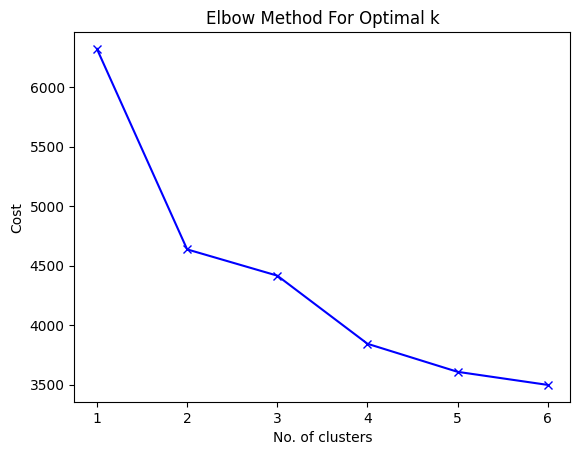

In [38]:
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

cost = []
K = range(1,7)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, random_state=SEED)
    kmode.fit_predict(df_selected_onehot)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [39]:
k = 2

categorical_data = df_selected_onehot

kmodes = KModes(n_clusters=k, init = "Cao", n_init = 1, verbose=1)
clusters = kmodes.fit_predict(categorical_data)

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(categorical_data).toarray()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 372, cost: 4637.0
Run 1, iteration: 2/100, moves: 121, cost: 4637.0


# PCA

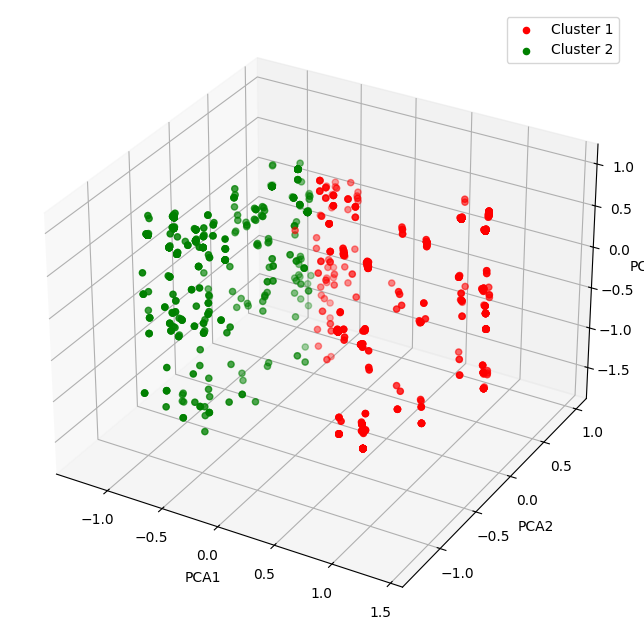

In [41]:
# prompt: PCA

# PCAを実行
pca = PCA(n_components=3)  # 3次元に削減
reduced_data_pca = pca.fit_transform(categorical_data)

# 3Dプロットを作成
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue']

for cluster in range(k):
    points = reduced_data_pca[clusters == cluster]
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors[cluster], label=f'Cluster {cluster+1}')

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.legend()
plt.show()

# t-SNE

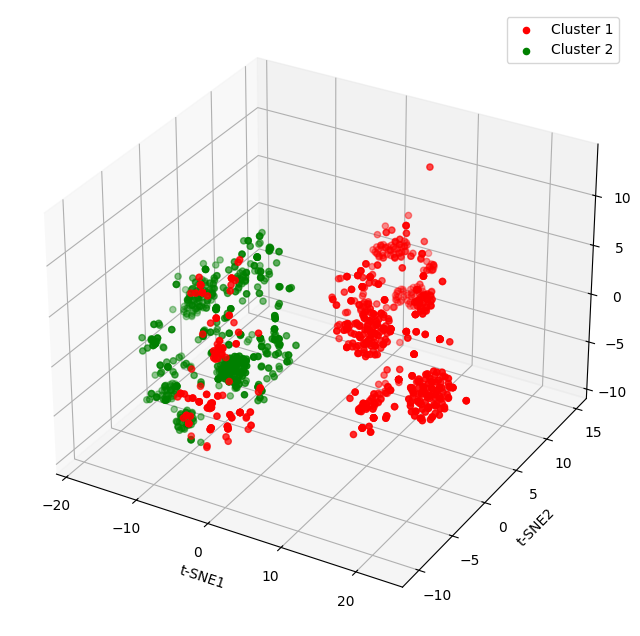

In [40]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# t-SNEを実行
tsne = TSNE(n_components=3, perplexity=70, random_state=SEED)
reduced_data_tsne = tsne.fit_transform(categorical_data)

# 3Dプロットを作成
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue']

for cluster in range(k):
    points = reduced_data_tsne[clusters == cluster]
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors[cluster], label=f'Cluster {cluster+1}')

ax.set_xlabel('t-SNE1')
ax.set_ylabel('t-SNE2')
ax.set_zlabel('t-SNE3')
plt.legend()
plt.show()


# UMAP

In [42]:
!pip install umap-learn

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


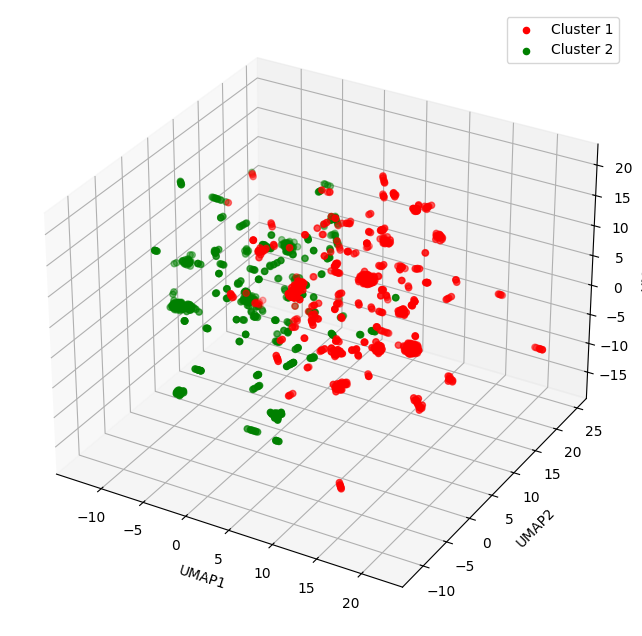

In [55]:

import umap

# UMAPを実行
reducer = umap.UMAP(n_neighbors=2, min_dist=0.8, n_components=3, metric='cosine',random_state=SEED)
reduced_data_umap = reducer.fit_transform(categorical_data)

# 3Dプロットを作成
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue']

for cluster in range(k):
    points = reduced_data_umap[clusters == cluster]
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors[cluster], label=f'Cluster {cluster+1}')

ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
plt.legend()
plt.show()

# Statistics

In [56]:
for i in range(k):
    num = list(clusters).count(i)
    print(f'Cluster {i+1}: n = {num}')

Cluster 1: n = 768
Cluster 2: n = 581


In [57]:
df = data.copy()
df = df.replace({91: np.nan}).replace({92: np.nan})
df['cluster'] = clusters+1

In [58]:
from scipy import stats

for column in df.columns:
  if column == 'cluster':
    continue
  crosstab = pd.crosstab(df[column], df['cluster'])
  chi2, p, dof, expected = stats.chi2_contingency(crosstab)

  print(f"Column: {column}")
  print(crosstab)
  print(f"Chi-square statistic: {chi2}")
  print(f"P-value: {p}")
  print("-" * 20)


Column: Amnesia_verb
cluster         1    2
Amnesia_verb          
False          33   27
True          735  554
Chi-square statistic: 0.03085924481206664
P-value: 0.8605547797669613
--------------------
Column: SeizOccur
cluster    1  2
SeizOccur      
1.0        9  6
2.0        7  3
3.0        5  1
Chi-square statistic: 1.1022222222222222
P-value: 0.57630911104561
--------------------
Column: HASeverity
cluster     1  2
HASeverity      
1.0         2  0
2.0         0  1
Chi-square statistic: 0.1875
P-value: 0.6650055421020291
--------------------
Column: VomitNbr
cluster     1   2
VomitNbr         
1.0        76  47
2.0        45  27
3.0       108  40
Chi-square statistic: 4.533391802891455
P-value: 0.10365409826257085
--------------------
Column: SFxPalpDepress
cluster           1    2
SFxPalpDepress          
True            768  581
Chi-square statistic: 0.0
P-value: 1.0
--------------------
Column: FontBulg
cluster     1    2
FontBulg          
False     767  577
True        1   

# Over2_filterd

In [59]:
# データの読み込み
data = pd.read_csv('/content/drive/MyDrive/over2_filtered_15_data.csv')

# 特徴量とターゲットに分ける
X = data.drop(columns=['PosCT'])  # PosCT以外を特徴量に
y = data['PosCT']  # PosCTをターゲットに

In [60]:
for i in X.columns:
    print(X[i].value_counts())

Amnesia_verb
0     2563
1     1677
91     537
Name: count, dtype: int64
SeizOccur
92    4624
1       90
2       55
3        8
Name: count, dtype: int64
HASeverity
92    2150
2     1390
1      847
3      390
Name: count, dtype: int64
VomitNbr
92    3187
3      763
1      509
2      318
Name: count, dtype: int64
SFxPalpDepress
92    4752
1       14
0       11
Name: count, dtype: int64
FontBulg
0    4777
Name: count, dtype: int64
ActNorm
1    3966
0     811
Name: count, dtype: int64
HemaSize
92    3075
2      952
3      468
1      282
Name: count, dtype: int64
Clav
1    2730
0    2047
Name: count, dtype: int64
NeuroD
0    4668
1     109
Name: count, dtype: int64
OSI
0    3772
1    1005
Name: count, dtype: int64
High_impact_InjSev
2    2656
3    1505
1     616
Name: count, dtype: int64
LocLen
92    2430
2     1052
3      778
1      421
4       96
Name: count, dtype: int64
HemaLoc
92    3073
1      659
3      602
2      443
Name: count, dtype: int64


In [64]:
for col in data.columns:
  if col not in categorical_variables:
     data[col] = data[col].astype(bool)

In [65]:
df_selected_onehot = pd.get_dummies(data.iloc[:,:-1], columns = categorical_variables)
df_selected_onehot

,Amnesia_verb,SFxPalpDepress,FontBulg,ActNorm,Clav,NeuroD,OSI,SeizOccur_1,SeizOccur_2,SeizOccur_3,...,High_impact_InjSev_3,LocLen_1,LocLen_2,LocLen_3,LocLen_4,LocLen_92,HemaLoc_1,HemaLoc_2,HemaLoc_3,HemaLoc_92
0,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,True,True,False,True,True,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,True
2,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
4,True,True,False,True,False,False,True,False,False,False,...,True,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,True,True,False,True,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4773,True,True,False,True,True,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
4774,True,True,False,True,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4775,False,True,False,True,True,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False


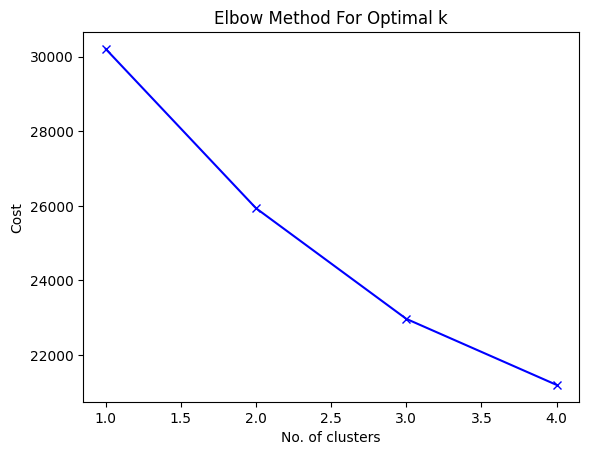

In [66]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang",random_state=SEED)
    kmode.fit_predict(df_selected_onehot)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [67]:
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
k = 2

categorical_data = df_selected_onehot

kmodes = KModes(n_clusters=k, init = "Huang", n_init = 1, verbose=1)
clusters = kmodes.fit_predict(categorical_data)

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(categorical_data).toarray()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 966, cost: 26590.0
Run 1, iteration: 2/100, moves: 415, cost: 26590.0


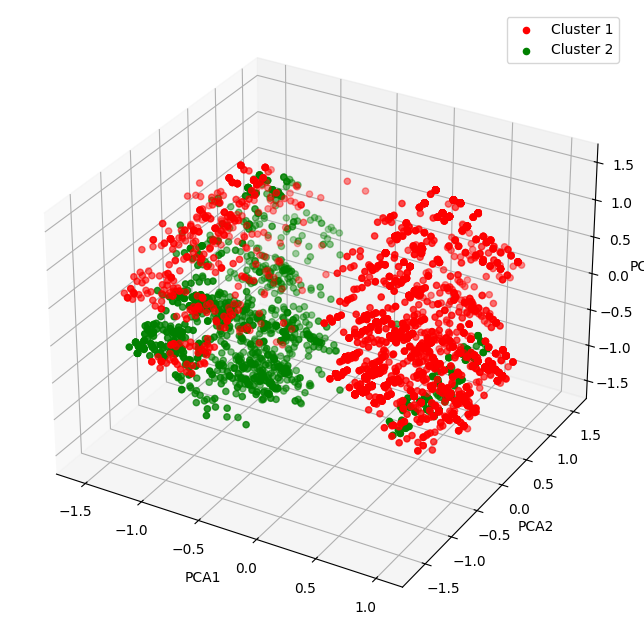

In [68]:
# prompt: PCA

# PCAを実行
pca = PCA(n_components=3)  # 3次元に削減
reduced_data_pca = pca.fit_transform(categorical_data)

# 3Dプロットを作成
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue']

for cluster in range(k):
    points = reduced_data_pca[clusters == cluster]
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors[cluster], label=f'Cluster {cluster+1}')

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.legend()
plt.show()

In [69]:
for i in range(k):
    num = list(clusters).count(i)
    print(f'Cluster {i+1}: n = {num}')

Cluster 1: n = 3292
Cluster 2: n = 1485


In [70]:
df = data.copy()
df = df.replace({91: np.nan}).replace({92: np.nan})
df['cluster'] = clusters+1

from scipy import stats

for column in df.columns:
  if column == 'cluster':
    continue
  crosstab = pd.crosstab(df[column], df['cluster'])
  chi2, p, dof, expected = stats.chi2_contingency(crosstab)

  print(f"Column: {column}")
  print(crosstab)
  print(f"Chi-square statistic: {chi2}")
  print(f"P-value: {p}")
  print("-" * 20)

Column: Amnesia_verb
cluster          1     2
Amnesia_verb            
False         2124   439
True          1168  1046
Chi-square statistic: 501.51929203542954
P-value: 4.440215077616402e-111
--------------------
Column: SeizOccur
cluster     1   2
SeizOccur        
1.0        57  33
2.0        35  20
3.0         6   2
Chi-square statistic: 0.4407556080283356
P-value: 0.8022156604060616
--------------------
Column: HASeverity
cluster       1    2
HASeverity          
1.0         569  278
2.0         886  504
3.0         268  122
Chi-square statistic: 4.742792573779423
P-value: 0.09335029144892816
--------------------
Column: VomitNbr
cluster     1    2
VomitNbr          
1.0       358  151
2.0       246   72
3.0       592  171
Chi-square statistic: 9.595680634073451
P-value: 0.00824753990005665
--------------------
Column: SFxPalpDepress
cluster            1     2
SFxPalpDepress            
False              6     5
True            3286  1480
Chi-square statistic: 0.4965627085371935